# Prework

Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

Chargeons le dataframe

In [3]:
data = pd.read_csv('../raw_data/data_full.csv')

In [4]:
data

,steam_appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,movies,...,underwater,unforgiving,utilities,vr,vr_only,vampire,video_production,villain_protagonist,violent,visual_novel,voice_control,voxel,walking_simulator,war,wargame,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,NaN,...,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,550
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,80,0,0,0,0,0,0,5,122,0,0,0
2,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,https://steamcdn-a.akamaihd.net/steam/apps/50/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/50/...,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,https://steamcdn-a.akamaihd.net/steam/apps/70/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/70/...,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19,"With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...",https://steamcdn-a.akamaihd.net/steam/apps/80/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/80/...,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26863,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",The Room of Pandora is a third-person interact...,https://steamcdn-a.akamaihd.net/steam/apps/106...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://s

In [5]:
data.owners.value_counts()

0-20000                18530
20000-50000             3018
50000-100000            1675
100000-200000           1367
200000-500000           1240
500000-1000000           493
1000000-2000000          286
2000000-5000000          191
5000000-10000000          42
10000000-20000000         20
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [6]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(f'"{key}"')

"steam_appid"
"name"
"release_date"
"english"
"developer"
"publisher"
"platforms"
"required_age"
"categories"
"genres"
"steamspy_tags"
"achievements"
"positive_ratings"
"negative_ratings"
"average_playtime"
"median_playtime"
"owners"
"price"
"detailed_description"
"about_the_game"
"short_description"
"header_image"
"screenshots"
"background"
"movies"
"pc_requirements"
"mac_requirements"
"linux_requirements"
"minimum"
"recommended"
"website"
"support_url"
"support_email"
"1980s"
"1990s"
"2.5d"
"2d"
"2d_fighter"
"360_video"
"3d"
"3d_platformer"
"3d_vision"
"4_player_local"
"4x"
"6dof"
"atv"
"abstract"
"action"
"action_rpg"
"action_adventure"
"addictive"
"adventure"
"agriculture"
"aliens"
"alternate_history"
"america"
"animation_&_modeling"
"anime"
"arcade"
"arena_shooter"
"artificial_intelligence"
"assassin"
"asynchronous_multiplayer"
"atmospheric"
"audio_production"
"bmx"
"base_building"
"baseball"
"based_on_a_novel"
"basketball"
"batman"
"battle_royale"
"beat_em_up"
"beautiful"
"benchm

# Retrait des colonnes non pertinentes

Les colonnes de requirements sont abandonnées car peu pertinantes dans l'analyse du prix et des owners.

In [7]:
data.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements', 'minimum', 'recommended'], inplace=True)

De même les colonnes de support sont peu pertinantes pour nous.

In [8]:
data.drop(columns=['support_email', 'support_url'], inplace=True)

La colonne "movies" serait un peu trop complexe à analyser pour le moment, puisque qu'elle comprend des vidéos, et est très incomplète. 

In [9]:
data.drop(columns=['movies'], inplace=True)

La colonne "age" semble très incomplète. C'est pourquoi nous ne la prendront pas en compte.

In [10]:
data['required_age'].value_counts()

0     26284
18      307
16      187
12       67
7        12
3        11
Name: required_age, dtype: int64

In [11]:
data.drop(columns=['required_age'], inplace=True)

# Work date_time (& list nullvalue), (is_a_remake, sells_per_days, days_on_steam)

Il n'y a presque plus de valeurs manquantes et/ou nulles. (à l'exception de la colonne 'website')

In [12]:
obj = data.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

steam_appid , 0
name , 0
release_date , 0
english , 0
developer , 0
publisher , 0
platforms , 0
categories , 0
genres , 0
steamspy_tags , 0
achievements , 0
positive_ratings , 0
negative_ratings , 0
average_playtime , 0
median_playtime , 0
owners , 0
price , 0
detailed_description , 0
about_the_game , 0
short_description , 0
header_image , 0
screenshots , 0
background , 0
website , 8988
1980s , 0
1990s , 0
2.5d , 0
2d , 0
2d_fighter , 0
360_video , 0
3d , 0
3d_platformer , 0
3d_vision , 0
4_player_local , 0
4x , 0
6dof , 0
atv , 0
abstract , 0
action , 0
action_rpg , 0
action_adventure , 0
addictive , 0
adventure , 0
agriculture , 0
aliens , 0
alternate_history , 0
america , 0
animation_&_modeling , 0
anime , 0
arcade , 0
arena_shooter , 0
artificial_intelligence , 0
assassin , 0
asynchronous_multiplayer , 0
atmospheric , 0
audio_production , 0
bmx , 0
base_building , 0
baseball , 0
based_on_a_novel , 0
basketball , 0
batman , 0
battle_royale , 0
beat_em_up , 0
beautiful , 0
benchmark 

Transformons la colonne 'release_date' en datetime

In [13]:
data['release_date'] = data['release_date'].astype('datetime64')

In [14]:
data['jul1'] = pd.DatetimeIndex(data['release_date']).to_julian_date()

In [15]:
data['jul1'].sort_values()

2523     2450629.5
3        2451125.5
2        2451483.5
0        2451849.5
848      2451983.5
           ...    
17911    2458598.5
22322    2458598.5
19406    2458598.5
24226    2458599.5
23525    2458604.5
Name: jul1, Length: 26868, dtype: float64

In [16]:
data['days_on_steam'] = abs(data['jul1'] - 2458604.50000)

In [17]:
data['days_on_steam'].sort_values().tail(500)

681     3395.0
614     3395.0
715     3395.0
690     3400.0
209     3416.0
695     3417.0
588     3422.0
587     3422.0
585     3422.0
584     3422.0
381     3422.0
597     3422.0
586     3422.0
485     3424.0
565     3424.0
658     3428.0
641     3429.0
629     3430.0
650     3435.0
242     3436.0
671     3436.0
518     3437.0
613     3437.0
519     3437.0
377     3438.0
520     3444.0
402     3445.0
647     3445.0
60      3450.0
15      3450.0
566     3450.0
512     3451.0
672     3452.0
657     3453.0
413     3456.0
394     3456.0
414     3456.0
247     3457.0
486     3457.0
216     3457.0
193     3458.0
639     3463.0
568     3464.0
578     3464.0
555     3464.0
314     3464.0
651     3465.0
440     3465.0
537     3465.0
616     3466.0
59      3468.0
678     3470.0
632     3471.0
633     3471.0
631     3471.0
649     3472.0
421     3472.0
652     3473.0
617     3473.0
473     3478.0
637     3479.0
471     3479.0
673     3480.0
640     3484.0
472     3485.0
540     3486.0
539     34

In [18]:
data = data.drop(data[data['days_on_steam'] < 30].index)

In [19]:
data['is_a_remake'] = data['jul1'] - 2452894.50000

In [20]:
def is_a_remake(value):
    if value < 0:
        return 0
    else:
        return 1

In [21]:
data['is_a_remake'] = data['is_a_remake'].apply(is_a_remake)

# Observations des min/max

Observons les valeurs des prix

In [22]:
data.sort_values(by = 'price', ascending = False).head()[['price', 'name']]

,price,name
20909,421.99,ADR-Labelling Game
12882,303.99,GameMaker Studio 2 UWP
9861,209.99,Houdini Indie
7822,154.99,3DF Zephyr Lite Steam Edition
16939,154.99,Tactics 2: War


le jeux le plus cher semble être une valeur erronée, retirons la ligne.

In [23]:
data = data.drop(index=20909)

In [24]:
data.dtypes

steam_appid                                   int64
name                                         object
release_date                         datetime64[ns]
english                                       int64
developer                                    object
publisher                                    object
platforms                                    object
categories                                   object
genres                                       object
steamspy_tags                                object
achievements                                  int64
positive_ratings                              int64
negative_ratings                              int64
average_playtime                              int64
median_playtime                               int64
owners                                       object
price                                       float64
detailed_description                         object
about_the_game                               object
short_descri

# Création de nouvelles features (owner median/min/max, has a website, nb_review)

Rajoutons les min, max, medians pour les owners, ainsi qu'une colonne 'revenue' basée sur la mediane des owners et le prix

In [25]:
tmp = pd.DataFrame()
tmp[['lower', 'upper']] = data['owners'].str.split('-', expand = True)
tmp['lower'] = tmp['lower'].astype('int')
tmp['upper'] = tmp['upper'].astype('int')
tmp['owner_median'] = (tmp['lower'] + tmp['upper']) / 2
tmp

,lower,upper,owner_median
0,10000000,20000000,15000000.0
1,5000000,10000000,7500000.0
2,5000000,10000000,7500000.0
3,5000000,10000000,7500000.0
4,10000000,20000000,15000000.0
...,...,...,...
26752,0,20000,10000.0
26753,0,20000,10000.0
26754,0,20000,10000.0
26756,0,20000,10000.0


In [26]:
data['owner_median'] = tmp['owner_median']
data['owner_lower'] = tmp['lower']
data['owner_upper'] = tmp['upper']

Create a column "has_a_website"

In [27]:
data.website = data['website'].fillna(0)

In [28]:
condition = lambda x: 1 if x != 0 else 0

In [29]:
data['has_a_website'] = data.website.apply(condition)

Création d'une colonne nombre total de review

In [30]:
data['nb_review'] = data['positive_ratings'] + data['negative_ratings']

# Etude de l'intervalle 0-20000

In [31]:
new_data = data[data["owner_median"] == 10000]
new_data.shape

(18108, 403)

In [32]:
new_data.nb_review.mean()

41.0568809366026

<AxesSubplot:>

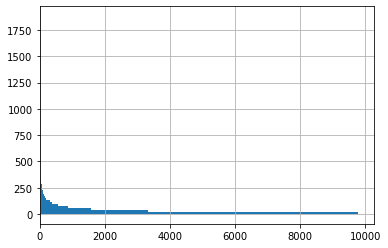

In [33]:
new_data.nb_review.hist(bins=100, orientation='horizontal',)

(array([1.7341e+04, 6.0900e+02, 1.2300e+02, 2.6000e+01, 6.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.8890e+02, 3.7680e+02, 5.6470e+02, 7.5260e+02,
        9.4050e+02, 1.1284e+03, 1.3163e+03, 1.5042e+03, 1.6921e+03,
        1.8800e+03]),
 <BarContainer object of 10 artists>)

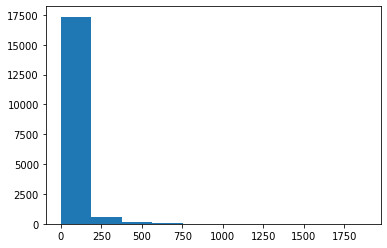

In [34]:
plt.hist(new_data.nb_review)

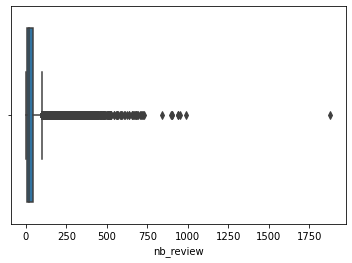

In [35]:
ax = sns.boxplot(data=new_data,x="nb_review", )

[array([6., 1.]), array([43., 98.])]

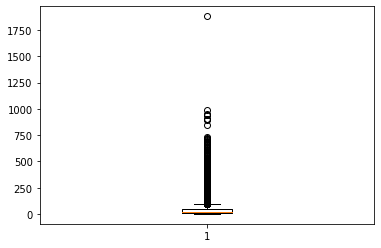

In [36]:
B = plt.boxplot(new_data.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [37]:
new_data = new_data.sort_values(by='nb_review', ascending=False)

In [38]:
new_data.head(11)

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,violent,visual_novel,voice_control,voxel,walking_simulator,war,wargame,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,jul1,days_on_steam,is_a_remake,owner_median,owner_lower,owner_upper,has_a_website,nb_review
20828,819500,Fear The Wolves,2019-02-06,1,Vostok Games,Focus Home Interactive,windows,Multi-player;Online Multi-Player;Online Co-op;...,Action;Adventure;Massively Multiplayer,Battle Royale;FPS;Survival,22,928,952,0,0,0-20000,16.99,"<a href=""https://steamcommunity.com/linkfilter...","<a href=""https://steamcommunity.com/linkfilter...",Fear the Wolves is a competitive Battle Royale...,https://steamcdn-a.akamaihd.net/steam/apps/819...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/819...,http://www.fear-the-wolves.com/,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2458520.5,84.0,1,10000.0,0,20000,1,1880
2922,295950,新流星搜劍錄,2017-12-20,0,Titans,Titans,windows,Multi-player;Online Multi-Player;MMO,Violent;Action;Adventure;Indie;Massively Multi...,Action;RPG;Fighting,0,664,323,0,0,0-20000,15.49,&quot; Master of Meteor Blades &quot; is a col...,&quot; Master of Meteor Blades &quot; is a col...,&quot; Master of Meteor Blades &quot; is a col...,https://steamcdn-a.akamaihd.net/steam/apps/295...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/295...,0,0,...,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2458107.5,497.0,1,10000.0,0,20000,0,987
9096,477730,Eador. Imperium,2017-01-27,1,Snowbird Games,Snowbird Games,windows,Single-player;Steam Achievements;Steam Trading...,Indie;RPG;Strategy,Strategy;Indie;RPG,32,787,166,0,0,0-20000,14.99,"Hire heroes, build an army, prevail in battles...","Hire heroes, build an army, prevail in battles...","Hire heroes, build an army, prevail in battles...",https://steamcdn-a.akamaihd.net/steam/apps/477...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/477...,http://www.snowbirdgames.com/eador/?lang=en,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2457780.5,824.0,1,10000.0,0,20000,1,953
9586,495990,True Love ～Confide to the Maple～,2016-10-05,1,SP-time,SP-time,windows,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Visual Novel;Casual;Indie,24,773,167,152,162,0-20000,8.99,tips: To all non-Chinese speaker<br>Chinese wo...,tips: To all non-Chinese speaker<br>Chinese wo...,Guo Hengyi and Yao Fengyi are childhood sweeth...,https://steamcdn-a.akamaihd.net/steam/apps/495...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/495...,https://sp-time.com/,0,...,0,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2457666.5,938.0,1,10000.0,0,20000,1,940
14115,623080,planetarian HD,2017-05-08,0,VisualArts/Key,VisualArts,windows,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Simulation,Visual Novel;Anime;Casual,21,927,10,0,0,0-20000,6.99,It is thirty years after the failure of the Sp...,It is thirty years after the failure of the Sp...,planetarian HD is an engaging and emotional vi...,https://steamcdn-a.akamaihd.net/steam/apps/623...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/623...,0,0,...,0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2457881.5,723.0,1,10000.0,0,20000,0,937
12389,571880,Angels with Scaly Wings,2017-01-31,1,Radical Phi,Radical Phi,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Violent;Adventure;Indie;RPG;Simulation,Dragons;Visual Novel;Dating Sim,63,878,25,880,880,0-20000,7.99,Angels with Scaly Wings is a unique visual nov...,Angels with Scaly Wings is a unique visual nov...,"You, the player, ar

In [39]:
alpha = round(20000/96)
alpha

208

In [40]:
new_data['owner_estimated'] = new_data['nb_review'] * alpha - 150

In [41]:
new_data[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
20828,Fear The Wolves,1880,390890
2922,新流星搜劍錄,987,205146
9096,Eador. Imperium,953,198074
9586,True Love ～Confide to the Maple～,940,195370
14115,planetarian HD,937,194746
12389,Angels with Scaly Wings,903,187674
2478,Gunjitsu,903,187674
2842,H-Hour: World's Elite,895,186010
18965,A Light in the Dark,844,175402
16004,Descenders,728,151274


In [42]:
new_data[['name', 'nb_review', 'owner_estimated']].tail(3)

,name,nb_review,owner_estimated
14890,Puzzle Bloc Invasion,1,58
20014,PuppetShow: Return to Joyville Collector's Edi...,1,58
13108,Disc League,1,58


In [43]:
condition = lambda x: 20000 if x > 20000 else x

In [44]:
new_data['owner_estimated'] = new_data.owner_estimated.apply(condition)

In [45]:
new_data[['name', 'nb_review', 'owner_estimated']].tail(2500)

,name,nb_review,owner_estimated
3364,P-3 Biotic,3,474
26349,Kare wa Kanojo,3,474
26348,Capture the planet: Cute War,3,474
15532,Mino Saga,3,474
26346,Chaos Village,3,474
...,...,...,...
12162,Tier 1,1,58
18331,SpacePig,1,58
14890,Puzzle Bloc Invasion,1,58
20014,PuppetShow: Return to Joyville Collector's Edi...,1,58


# Etude de l'intervalle 20000-50000

In [46]:
new_data2 = data[data["owner_median"] == 35000]

In [47]:
new_data2.nb_review.mean()

235.54684894964987

<AxesSubplot:>

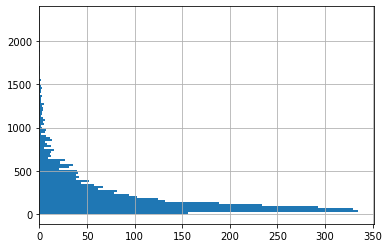

In [48]:
new_data2.nb_review.hist(bins=100, orientation='horizontal',)

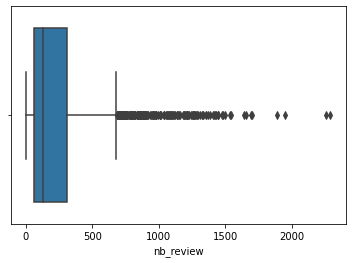

In [49]:
ax = sns.boxplot(data=new_data2,x="nb_review")

[array([64.,  1.]), array([312., 681.])]

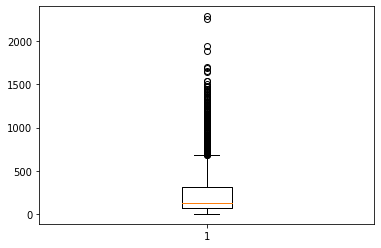

In [50]:
B = plt.boxplot(new_data2.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [51]:
new_data2 = new_data2.sort_values(by='nb_review', ascending=False)

In [52]:
alpha = round(30000/690)
alpha

43

In [53]:
new_data2['owner_estimated'] = (new_data2['nb_review'] * alpha) + 20000

In [54]:
condition = lambda x: 50000 if x > 50000 else x

In [55]:
new_data2['owner_estimated'] = new_data2.owner_estimated.apply(condition)

In [56]:
new_data2[['name', 'nb_review', 'owner_estimated']].tail(200)

,name,nb_review,owner_estimated
14749,FINAL FANTASY XV WINDOWS EDITION MOD ORGANIZER,26,21118
19376,The Scent of Summer,26,21118
6577,Tactical Soccer The New Season,26,21118
18031,Kokoda VR,26,21118
5491,Dale Hardshovel HD,26,21118
13512,My Own Little Planet,26,21118
20536,Starman's VR Experience,26,21118
3008,Millennium 4 - Beyond Sunset,26,21118
3281,Wildlife Park 2 - Farm World,26,21118
25831,Offendron Warrior,26,21118


# Etude 50000-100000

In [57]:
new_data3 = data[data["owner_median"] == 75000]

<AxesSubplot:>

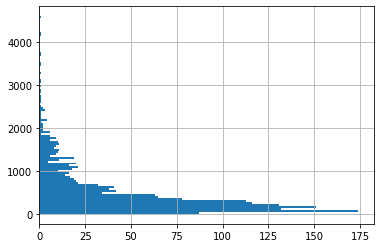

In [58]:
new_data3.nb_review.hist(bins=100, orientation='horizontal',)

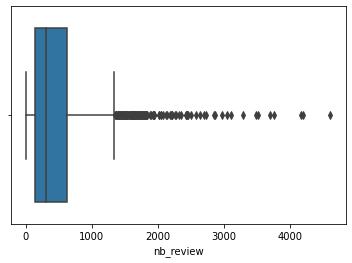

In [59]:
ax = sns.boxplot(data=new_data3,x="nb_review")

[array([146.,   3.]), array([ 624.75, 1330.  ])]

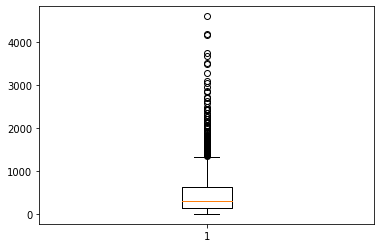

In [60]:
B = plt.boxplot(new_data3.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [61]:
new_data3 = new_data3.sort_values(by='nb_review', ascending=False)

In [62]:
alpha = round(50000/1350)
alpha

37

In [63]:
new_data3['owner_estimated'] = (new_data3['nb_review'] * alpha) + 50000

In [64]:
condition = lambda x: 100000 if x > 100000 else x

In [65]:
new_data3['owner_estimated'] = new_data3.owner_estimated.apply(condition)

In [66]:
new_data3[['name', 'nb_review', 'owner_estimated']].tail(150)

,name,nb_review,owner_estimated
9826,Star Project,67,52479
15173,Aetherspace,67,52479
9757,The Sunset,66,52442
12722,Tourists Kidnapped a Little Bear,66,52442
13720,Crazy Buggy Racing,66,52442
5942,Lilly and Sasha: Guardian Angels,66,52442
7426,Army of Tentacles: (Not) A Cthulhu Dating Sim,65,52405
1127,Avernum 4,65,52405
7574,Silver Knight,64,52368
10568,Where are my Internets?,64,52368


# Etude 100000-200000

In [67]:
new_data4 = data[data["owner_median"] == 150000]

<AxesSubplot:>

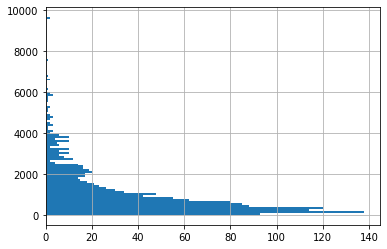

In [68]:
new_data4.nb_review.hist(bins=100, orientation='horizontal',)

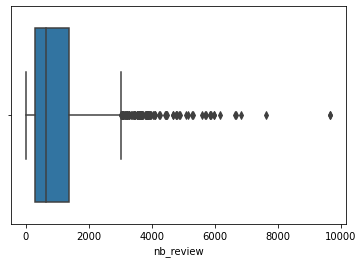

In [69]:
ax = sns.boxplot(data=new_data4,x="nb_review")

[array([294.,  10.]), array([1387., 3021.])]

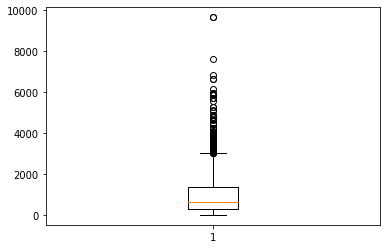

In [70]:
B = plt.boxplot(new_data4.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [71]:
new_data4 = new_data4.sort_values(by='nb_review', ascending=False)

In [72]:
alpha = round(100000/3027)
alpha

33

In [73]:
new_data4['owner_estimated'] = (new_data4['nb_review'] * alpha) + 100000

In [74]:
condition = lambda x: 200000 if x > 200000 else x

In [75]:
new_data4['owner_estimated'] = new_data4.owner_estimated.apply(condition)

In [76]:
new_data4[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
13437,The Evil Within 2,9661,200000
12848,Sonic Mania,9653,200000
4755,SURVIVAL,7625,200000
5392,Hook,6829,200000
6592,Rabi-Ribi,6663,200000
5148,Tree of Life,6636,200000
11010,Zup!,6176,200000
25744,古剑奇谭三(Gujian3),5980,200000
17106,Total War Saga: THRONES OF BRITANNIA,5965,200000
5295,Battle Brothers,5890,200000


# Etude 200000-500000 

In [77]:
new_data5 = data[data["owner_median"] == 350000]

<AxesSubplot:>

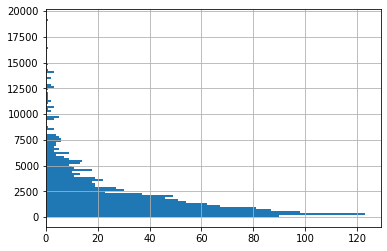

In [78]:
new_data5.nb_review.hist(bins=100, orientation='horizontal',)

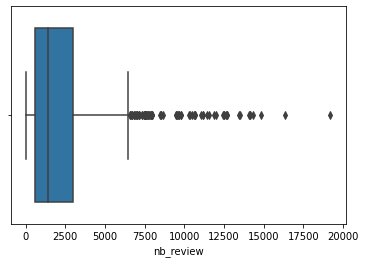

In [79]:
ax = sns.boxplot(data=new_data5,x="nb_review")

[array([592.75,  19.  ]), array([2974.25, 6424.  ])]

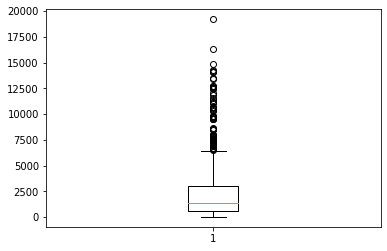

In [80]:
B = plt.boxplot(new_data5.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [81]:
new_data5 = new_data5.sort_values(by='nb_review', ascending=False)

In [82]:
alpha = round(300000/6424)
alpha

47

In [83]:
new_data5['owner_estimated'] = (new_data5['nb_review'] * alpha) + 200000

In [84]:
condition = lambda x: 500000 if x > 500000 else x

In [85]:
new_data5['owner_estimated'] = new_data5.owner_estimated.apply(condition)

In [86]:
new_data5[['name', 'nb_review', 'owner_estimated']].tail(150)

,name,nb_review,owner_estimated
989,Memoir '44 Online,296,213912
936,Steel Storm: Burning Retribution,296,213912
5756,The Tower Of Elements,293,213771
10835,Turbo Pug 3D,291,213677
9493,Deep Space Dash,291,213677
7800,AI: Rampage,291,213677
7460,White Mirror,289,213583
3803,Horizon Shift,288,213536
2814,DarkEnd,287,213489
6013,Atonement: Scourge of Time,282,213254


# Etude 500000-1000000 

In [87]:
new_data6 = data[data["owner_median"] == 750000]

<AxesSubplot:>

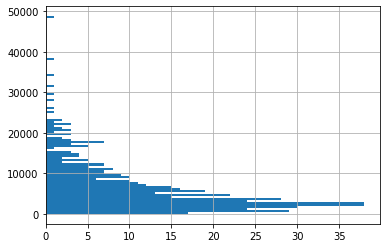

In [88]:
new_data6.nb_review.hist(bins=100, orientation='horizontal',)

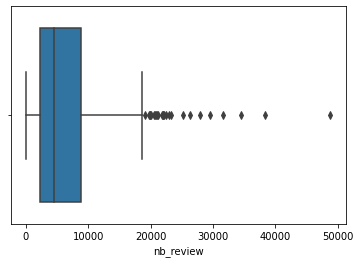

In [89]:
ax = sns.boxplot(data=new_data6,x="nb_review")

[array([2310.75,   23.  ]), array([ 8889.5, 18605. ])]

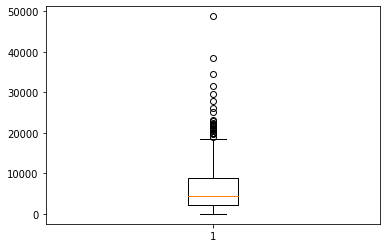

In [90]:
B = plt.boxplot(new_data6.nb_review)
[item.get_ydata() for item in B['whiskers']]

In [91]:
new_data6 = new_data6.sort_values(by='nb_review', ascending=False)

In [92]:
alpha = round(500000/18605)
alpha

27

In [93]:
new_data6['owner_estimated'] = (new_data6['nb_review'] * alpha) + 500000

In [94]:
condition = lambda x: 1000000 if x > 1000000 else x

In [95]:
new_data6['owner_estimated'] = new_data6.owner_estimated.apply(condition)

In [96]:
new_data6[['name', 'nb_review', 'owner_estimated']].head(150)

,name,nb_review,owner_estimated
10670,NieR:Automata™,48801,1000000
5961,Firewatch,38410,1000000
11692,Far Cry® 5,34454,1000000
7892,Conan Exiles,31595,1000000
6325,Squad,29547,1000000
7834,Friday the 13th: The Game,27967,1000000
8081,Watch_Dogs® 2,26271,1000000
3040,Miscreated,25158,1000000
11778,Life is Strange: Before the Storm,23225,1000000
13743,Quake Champions,22977,1000000


# Création nouvelles features (création owner_estimated, revenu)

In [97]:
test = new_data[['steam_appid', 'owner_estimated']]
test2 = new_data2[['steam_appid', 'owner_estimated']]
test3 = new_data3[['steam_appid', 'owner_estimated']]
test4 = new_data4[['steam_appid', 'owner_estimated']]
test5 = new_data5[['steam_appid', 'owner_estimated']]
test6 = new_data6[['steam_appid', 'owner_estimated']]
test_final = pd.concat([test, test2, test3, test4, test5, test6])

In [98]:
data.shape

(26414, 403)

In [99]:
data = data.merge(test_final, on='steam_appid', how="outer")

In [100]:
data.shape

(26414, 404)

In [101]:
data['owner_estimated'] = data['owner_estimated'].fillna(value=data.owner_median)

Création de la colonne revenu

In [102]:
data['revenu'] = data.owner_estimated * data.price

Création d'une colonne "1" pour traquer le nombre de jeux

In [103]:
data['1'] = 1

In [104]:
data['sells_per_days'] = data['owner_estimated']/data['days_on_steam']

# Création indice publisher

Création notation publisher

In [105]:
test = data.groupby(by=['publisher'], axis=0, as_index=False).sum()

In [106]:
test['nb_game_by_publisher'] = test['1']

In [107]:
test2 = test[['publisher', 'nb_game_by_publisher']]

In [108]:
data = data.merge(test2, on='publisher')

In [109]:
test = data.groupby(by=['developer'], axis=0, as_index=False).sum()

In [110]:
test['nb_game_by_dev'] = test['1']

In [111]:
test2 = test[['developer', 'nb_game_by_dev']]

In [112]:
data = data.merge(test2, on='developer')

In [113]:
test_nathan = pd.read_csv("../raw_data/df_with_score.csv")

In [114]:
test_nathan2 = test_nathan[['score_descriptif', 'steam_appid']]

In [115]:
data = data.merge(test_nathan2, on='steam_appid')

In [116]:
data

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,jul1,days_on_steam,is_a_remake,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,sells_per_days,nb_game_by_publisher,nb_game_by_dev,score_descriptif
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,0,144,...,0,0,0,0,0,0,0,0,0,550,2451849.5,6755.0,0,15000000.0,10000000,20000000,0,127873,15000000.0,1.078500e+08,1,2220.577350,24,20,6
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,http://www.dayofdefeat.com/,0,...,0,0,0,0,0,5,122,0,0,0,2452760.5,5844.0,0,7500000.0,5000000,10000000,1,3814,7500000.0,2.992500e+07,1,1283.367556,24,20,7
2,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,https://steamcdn-a.akamaihd.net/steam/apps/70/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/70/...,http://www.half-life.com/,0,...,0,0,0,0,0,0,0,0,0,0,2451125.5,7479.0,0,7500000.0,5000000,10000000,1,28855,7500000.0,5.392500e+07,1,1002.807862,24,20,12
3,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19,"With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...",https://steamcdn-a.akamaihd.net/steam/apps/80/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/80/...,0,0,...,0,0,0,0,0,0,0,0,0,0,2453065.5,5539.0,1,15000000.0,10000000,20000000,0,13559,15000000.0,1.078500e+08,1,2708.070049,24,20,7
4,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,https://steamcdn-a.akamaihd.net/steam/apps/220...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/220...,http://www.half-life2.com,0,...,0,0,0,0,0,0,0,0,607,0,2453325.5,5279.0,1,15000000.0,10000000,20000000,1,70321,15000000.0,1.078500e+08,1,2841.447244,24,20,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26409,1048320,都市恐怖故事,2019-

In [117]:
data['ratio'] = data['positive_ratings'] / data['nb_review']

In [118]:
data['indé'] = data.developer != data.publisher

In [119]:
def indé(value):
    if value == True:
        return 1
    else:
        return 0

In [120]:
data.indé = data["indé"].apply(indé)

In [121]:
data

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,jul1,days_on_steam,is_a_remake,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,sells_per_days,nb_game_by_publisher,nb_game_by_dev,score_descriptif,ratio,indé
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,https://steamcdn-a.akamaihd.net/steam/apps/10/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/10/...,0,144,...,0,0,0,0,0,0,0,550,2451849.5,6755.0,0,15000000.0,10000000,20000000,0,127873,15000000.0,1.078500e+08,1,2220.577350,24,20,6,0.973888,0
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,https://steamcdn-a.akamaihd.net/steam/apps/30/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/30/...,http://www.dayofdefeat.com/,0,...,0,0,0,5,122,0,0,0,2452760.5,5844.0,0,7500000.0,5000000,10000000,1,3814,7500000.0,2.992500e+07,1,1283.367556,24,20,7,0.895648,0
2,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,https://steamcdn-a.akamaihd.net/steam/apps/70/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/70/...,http://www.half-life.com/,0,...,0,0,0,0,0,0,0,0,2451125.5,7479.0,0,7500000.0,5000000,10000000,1,28855,7500000.0,5.392500e+07,1,1002.807862,24,20,12,0.961878,0
3,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19,"With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...","With its extensive Tour of Duty campaign, a ne...",https://steamcdn-a.akamaihd.net/steam/apps/80/...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/80/...,0,0,...,0,0,0,0,0,0,0,0,2453065.5,5539.0,1,15000000.0,10000000,20000000,0,13559,15000000.0,1.078500e+08,1,2708.070049,24,20,7,0.893871,0
4,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,https://steamcdn-a.akamaihd.net/steam/apps/220...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/220...,http://www.half-life2.com,0,...,0,0,0,0,0,0,607,0,2453325.5,5279.0,1,15000000.0,10000000,20000000,1,70321,15000000.0,1.078500e+08,1,2841.447244,24,20,8,0.965601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26409,104

# Enregistrement du csv

In [122]:
#data.to_csv(r'data_clean.csv', index = False)

# Selection de la range du dataset

In [123]:
data_indé_1 = data[data['owner_median'] < 20000]
data_indé_2 = data[data['owner_median'] < 50000]
data_indé_3 = data[data['owner_median'] < 100000]
data_indé = data_indé_2

# Création du dataset final (merge travail nlp, selection des colonnes, pondération)

In [124]:
obj = data.isnull().sum()
nathan = []
for key,value in obj.iteritems():
    print(f'"{key}"')
    nathan.append(f"{key}")

"steam_appid"
"name"
"release_date"
"english"
"developer"
"publisher"
"platforms"
"categories"
"genres"
"steamspy_tags"
"achievements"
"positive_ratings"
"negative_ratings"
"average_playtime"
"median_playtime"
"owners"
"price"
"detailed_description"
"about_the_game"
"short_description"
"header_image"
"screenshots"
"background"
"website"
"1980s"
"1990s"
"2.5d"
"2d"
"2d_fighter"
"360_video"
"3d"
"3d_platformer"
"3d_vision"
"4_player_local"
"4x"
"6dof"
"atv"
"abstract"
"action"
"action_rpg"
"action_adventure"
"addictive"
"adventure"
"agriculture"
"aliens"
"alternate_history"
"america"
"animation_&_modeling"
"anime"
"arcade"
"arena_shooter"
"artificial_intelligence"
"assassin"
"asynchronous_multiplayer"
"atmospheric"
"audio_production"
"bmx"
"base_building"
"baseball"
"based_on_a_novel"
"basketball"
"batman"
"battle_royale"
"beat_em_up"
"beautiful"
"benchmark"
"bikes"
"blood"
"board_game"
"bowling"
"building"
"bullet_hell"
"bullet_time"
"crpg"
"capitalism"
"card_game"
"cartoon"
"cartoony"


In [125]:
data_ = pd.read_csv('../raw_data/df_with_topics.csv')
data__ = pd.read_csv('../raw_data/df_with_20_topics.csv')
data___ = pd.read_csv('../raw_data/df_with_25_topics.csv')

In [126]:
data__ = data__[['top_5_tags', 'steam_appid']]

In [127]:
data_test = data_indé[["steam_appid",
"english",
"price",
"days_on_steam",
"has_a_website",
"owner_estimated",
"score_descriptif",
"nb_review",
"nb_game_by_dev",
]]

In [128]:
data_final = data_test.merge(data__,  on='steam_appid')

In [129]:
data_final

,steam_appid,english,price,days_on_steam,has_a_website,owner_estimated,score_descriptif,nb_review,nb_game_by_dev,top_5_tags
0,402800,1,14.99,1115.0,1,8794.0,8,43,4,simulation early_access vr sandbox voxel
1,602770,1,7.19,142.0,1,20000.0,5,227,4,strategy turn_based_combat turn_based turn_bas...
2,1002,1,5.99,4949.0,1,22451.0,9,57,1,fighting multiplayer 1980s realistic real_time...
3,690810,1,15.49,533.0,1,20000.0,4,325,5,action gore violent vr horror
4,579040,1,0.00,805.0,1,1930.0,4,10,6,strategy vr realistic real_time_with_pause rea...
...,...,...,...,...,...,...,...,...,...,...
21102,1048320,0,2.09,33.0,0,682.0,7,4,1,adventure nudity sexual_content gore violent
21103,1048410,1,2.09,31.0,1,266.0,2,2,1,1980s relaxing realistic real_time_with_pause ...
21104,1048470,1,2.09,34.0,0,1098.0,2,6,1,casual strategy 1980s relaxing realistic
21105,1049230,1,2.09,34.0,0,266.0,4,2,1,adventure 1980s relaxing realistic real_time_w...


In [130]:
#data_ponderation = pd.read_csv('../raw_data/data_ponderation.csv')

In [131]:
#data_final = data_final.merge(data_ponderation,  on='steam_appid')

In [132]:
data_final

,steam_appid,english,price,days_on_steam,has_a_website,owner_estimated,score_descriptif,nb_review,nb_game_by_dev,top_5_tags
0,402800,1,14.99,1115.0,1,8794.0,8,43,4,simulation early_access vr sandbox voxel
1,602770,1,7.19,142.0,1,20000.0,5,227,4,strategy turn_based_combat turn_based turn_bas...
2,1002,1,5.99,4949.0,1,22451.0,9,57,1,fighting multiplayer 1980s realistic real_time...
3,690810,1,15.49,533.0,1,20000.0,4,325,5,action gore violent vr horror
4,579040,1,0.00,805.0,1,1930.0,4,10,6,strategy vr realistic real_time_with_pause rea...
...,...,...,...,...,...,...,...,...,...,...
21102,1048320,0,2.09,33.0,0,682.0,7,4,1,adventure nudity sexual_content gore violent
21103,1048410,1,2.09,31.0,1,266.0,2,2,1,1980s relaxing realistic real_time_with_pause ...
21104,1048470,1,2.09,34.0,0,1098.0,2,6,1,casual strategy 1980s relaxing realistic
21105,1049230,1,2.09,34.0,0,266.0,4,2,1,adventure 1980s relaxing realistic real_time_w...


# Enregistrement du dataset final

In [133]:
data_final.to_csv(r'data_final_indé_medium3.csv', index = False)

# Creation du dataset finale (mercredi)

Encodage des plateformes

In [134]:
data2 = pd.read_csv('../raw_data/full_followers.csv')
data2 = data2.rename(columns={'steam_id': 'steam_appid'})
data_final = data_final.merge(data2,  on='steam_appid', how='inner')

In [135]:
data_final = data_final[data_final.price > 0.1]
data_final = data_final[data_final.price < 50]
data_final = data_final[data_final.days_on_steam < 2000]

In [136]:
#df = data_final[['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9','topic_10','topic_11','topic_12','topic_13','topic_14','topic_15','topic_16','topic_17','topic_18','topic_19']]

In [137]:
#df

In [138]:
#df['best_topic'] = df.idxmax(axis=1)

In [139]:
#df2 = df[['best_topic']]

In [140]:
#data_final = df2.join(data_final)

In [141]:
data_final['target'] = data_final['nb_review']

In [142]:
import math
def log(value):
    return math.log(value)

In [143]:
data_final['target'] = data_final['target'].apply(log)

In [149]:
data_final.tail(100)

,steam_appid,english,price,days_on_steam,has_a_website,owner_estimated,score_descriptif,nb_review,nb_game_by_dev,top_5_tags,followers,target
20993,1027700,1,2.09,45.0,0,890.0,5,5,1,action casual 1980s relaxing realistic,27,1.609438
20994,1027720,1,2.09,54.0,0,1098.0,4,6,1,puzzle 2d pixel_graphics sokoban difficult,68,1.791759
20995,1027930,1,0.79,61.0,0,58.0,2,1,1,casual 1980s relaxing realistic real_time_with...,16,0.000000
20996,1027980,1,3.99,46.0,1,4842.0,3,24,1,simulation action clicker casual base_building,188,3.178054
20998,1028340,1,7.19,33.0,0,266.0,2,2,1,early_access sports relaxing realistic real_ti...,48,0.693147
20999,1028550,1,3.99,61.0,0,474.0,2,3,1,adventure 1980s relaxing realistic real_time_w...,22,1.098612
21000,1028570,1,3.99,50.0,0,10250.0,0,50,1,rhythm great_soundtrack tennis music psycholog...,792,3.912023
21001,1028610,1,4.79,57.0,0,890.0,6,5,1,adventure casual singleplayer side_scroller di...,24,1.609438
21002,1028730,1,11.39,60.0,1,1930.0,6,10,1,simulation early_access strategy city_builder ...,1125,2.302585
21003,1028760,1,11.39,42.0,1,2970.0,7,15,1,action anime 1980s relaxing realistic,284,2.708050


In [145]:
data_final.to_csv(r'data_final_final_final.csv', index = False)

In [189]:
jeux1 = data[data['steam_appid'] == 1031910]
jeux2 = data[data['steam_appid'] == 1032140]
jeux3 = data[data['steam_appid'] == 1028570]
jeux4 = data[data['steam_appid'] == 1028610]

In [190]:
jeux1

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,jul1,days_on_steam,is_a_remake,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,sells_per_days,nb_game_by_publisher,nb_game_by_dev,score_descriptif,ratio,indé
26338,1031910,The Path To Die,2019-03-08,1,Cat Logic Games,Cat Logic Games,windows,Single-player;Partial Controller Support;Steam...,Action;Adventure;Indie,Action;Gore;Violent,0,8,0,0,0,0-20000,13.49,"<h2 class=""bb_tag""><strong>Become a samurai, t...","<h2 class=""bb_tag""><strong>Become a samurai, t...",Travel to Feudal Japan and use your right stic...,https://steamcdn-a.akamaihd.net/steam/apps/103...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/103...,0,0,...,0,0,0,0,0,0,0,0,2458550.5,54.0,1,10000.0,0,20000,0,8,1514.0,20423.86,1,28.037037,1,1,4,1.0,0


In [191]:
jeux2

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,jul1,days_on_steam,is_a_remake,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,sells_per_days,nb_game_by_publisher,nb_game_by_dev,score_descriptif,ratio,indé
26339,1032140,Let's Worm,2019-03-15,1,Stegobubbles,Stegobubbles,windows,Single-player,Adventure;Indie;RPG,Indie;Adventure;RPG,6,0,1,0,0,0-20000,0.79,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",Let's Worm is in a league of its own. You can ...,https://steamcdn-a.akamaihd.net/steam/apps/103...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/103...,0,0,...,0,0,0,0,0,0,0,0,2458557.5,47.0,1,10000.0,0,20000,0,1,58.0,45.82,1,1.234043,1,1,3,0.0,0


In [186]:
jeux3

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,jul1,days_on_steam,is_a_remake,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,sells_per_days,nb_game_by_publisher,nb_game_by_dev,score_descriptif,ratio,indé
26304,1028570,Lofi Ping Pong,2019-03-12,1,Calvares,Kalvarez A. Party,windows,Single-player;Shared/Split Screen;Steam Achiev...,Indie,Indie;Rhythm;Music,5,47,3,0,0,0-20000,3.99,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",Meditative rhythm ping-pong,https://steamcdn-a.akamaihd.net/steam/apps/102...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/102...,0,0,...,0,0,0,0,0,0,0,0,2458554.5,50.0,1,10000.0,0,20000,0,50,10250.0,40897.5,1,205.0,1,1,0,0.94,1


In [187]:
jeux4

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,detailed_description,about_the_game,short_description,header_image,screenshots,background,website,1980s,...,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports,jul1,days_on_steam,is_a_remake,owner_median,owner_lower,owner_upper,has_a_website,nb_review,owner_estimated,revenu,1,sells_per_days,nb_game_by_publisher,nb_game_by_dev,score_descriptif,ratio,indé
26305,1028610,Shift Shaft,2019-03-05,1,Krobin Games,Krobin Games,windows,Single-player;Local Multi-Player;Shared/Split ...,Adventure;Casual;Indie,Indie;Adventure;Casual,33,5,0,0,0,0-20000,4.79,Shift Shaft is a challenging Side-Scroller pac...,Shift Shaft is a challenging Side-Scroller pac...,Take Shaft on his way to find his meaning of e...,https://steamcdn-a.akamaihd.net/steam/apps/102...,"[{'id': 0, 'path_thumbnail': 'https://steamcdn...",https://steamcdn-a.akamaihd.net/steam/apps/102...,0,0,...,0,0,0,0,0,0,0,0,2458547.5,57.0,1,10000.0,0,20000,0,5,890.0,4263.1,1,15.614035,1,1,6,1.0,0
